In [1]:
import pandas as pd
import numpy as np
import json
import requests
from elasticsearch import Elasticsearch 
import csv
import seaborn as sns
import matplotlib.pyplot as plt
es=Elasticsearch([{'host':'localhost','port':9200}])
headers = {'Content-type': 'application/json'}
f_line = []

In [2]:
header = ['pais','ano','sexo','idade','suicides_no','populacao','sucidios_por_100mil_populacao','pais-ano','idh_por_ano', 'pib_por_ano' ,'pib_per_capita','geracao']

In [1]:
df = pd.read_csv('C:\Projects\STUDY\DataScience\data_sets\suicidio_1985_to_2016.csv',  thousands=',')

NameError: name 'pd' is not defined

In [4]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,2156624900,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,2156624900,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,2156624900,796,Generation X


In [5]:
df.columns = header

In [6]:
df

,pais,ano,sexo,idade,suicides_no,populacao,sucidios_por_100mil_populacao,pais-ano,idh_por_ano,pib_por_ano,pib_per_capita,geracao
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,2156624900,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,2156624900,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,2156624900,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,2156624900,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,2156624900,796,Generation X


In [11]:
df = df[df['ano']<2012]

In [7]:
df.loc[:, 'idade'] = df['idade'].map(lambda x: x.replace('5-14 years', '05-14 years'))

In [12]:
out = json.loads(df.to_json(orient='records'))

In [ ]:
for (i, data) in enumerate(out) :
    response = es.index(index='studyanalyzes',doc_type='suicidio',id= i,body=data)
    print(response)   

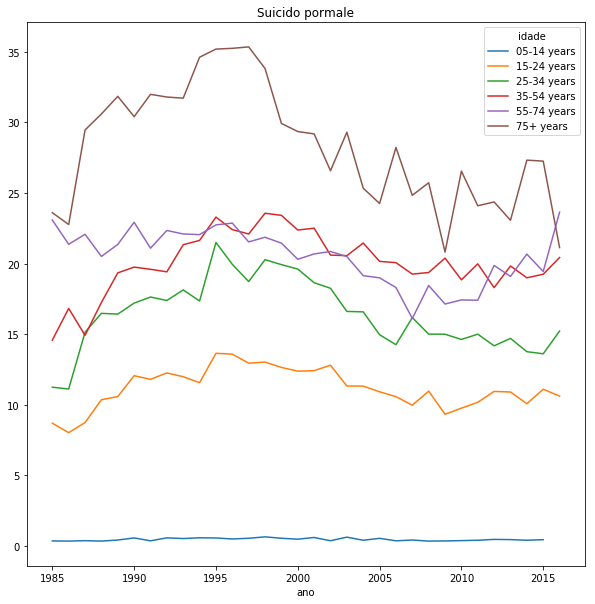

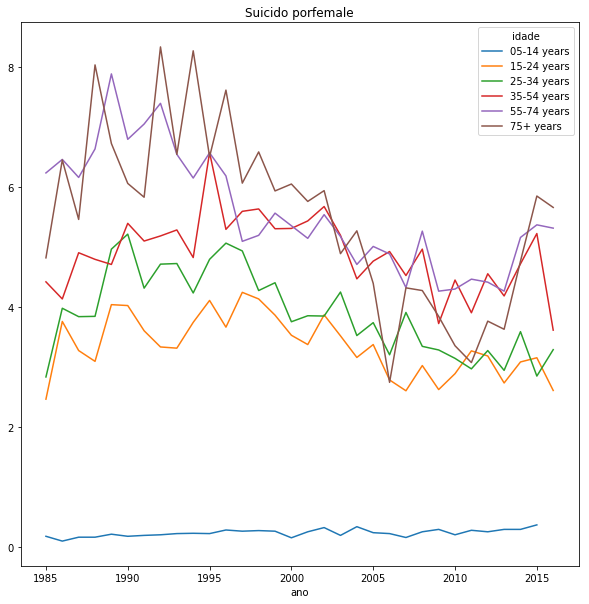

In [69]:
genders = ['male', 'female']

for gender in genders:
    grouped = df[df['sexo'] == gender].groupby(['ano', 'idade'])['sucidios_por_100mil_populacao'].median().unstack('idade')
    grouped.plot(figsize=(10, 10),
               title='Suicido por' + gender,
               legend=True)

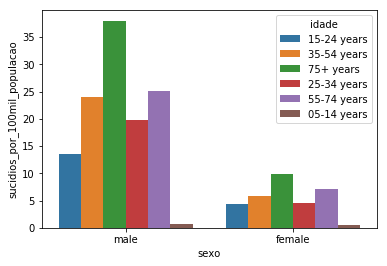

In [57]:
plt.figure(figsize=(15,25))
plt.title('Average Suicides / 100k Population')
sns.barplot(x='sexo', y='sucidios_por_100mil_populacao', hue='idade', data=df,ci=None)

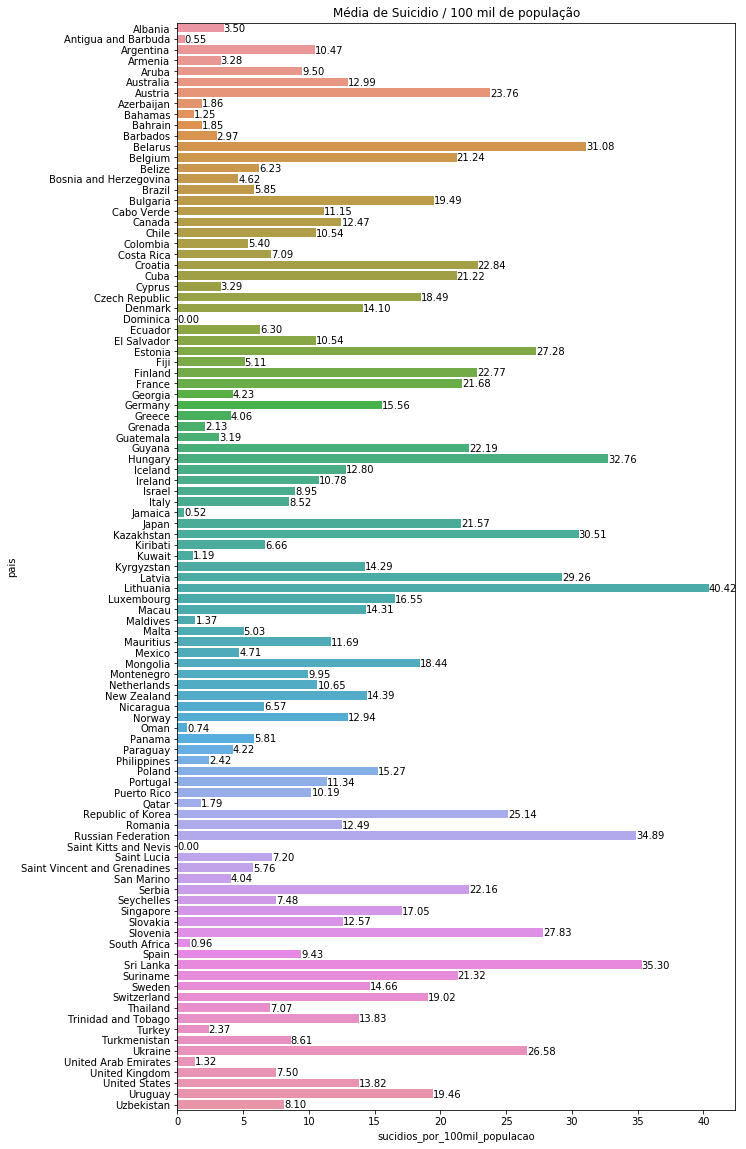

In [71]:
plt.figure(figsize=(10,20))
plt.title('Média de Suicidio / 100 mil de população')
ax = sns.barplot(x='sucidios_por_100mil_populacao',y='pais',data=df,ci=None)

#Colocar os valores na frente dos dados
for p in ax.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y()+.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center')
plt.show()